# Spaceship Titanic
### Predict which passengers are transported to an alternate dimension

### License: Attribution 4.0 International (CC BY 4.0)
#### Competition link: https://www.kaggle.com/competitions/spaceship-titanic/data

## Dataset Description
### File and Data Field Descriptions

---

#### **train.csv**
Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- **PassengerId** – A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.  
- **HomePlanet** – The planet the passenger departed from, typically their planet of permanent residence.  
- **CryoSleep** – Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  
- **Cabin** – The cabin number where the passenger is staying. Takes the form `deck/num/side`, where side can be either **P** for Port or **S** for Starboard.  
- **Destination** – The planet the passenger will be debarking to.  
- **Age** – The age of the passenger.  
- **VIP** – Whether the passenger has paid for special VIP service during the voyage.  
- **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** – Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  
- **Name** – The first and last names of the passenger.  
- **Transported** – Whether the passenger was transported to another dimension. This is the **target**, the column you are trying to predict.

---

#### **test.csv**
Personal records for the remaining one-third (~4300) of the passengers, to be used as test data.  
Your task is to predict the value of **Transported** for the passengers in this set.

---

#### **sample_submission.csv**
A submission file in the correct format.

- **PassengerId** – Id for each passenger in the test set.  
- **Transported** – The target. For each passenger, predict either **True** or **False**.



# Project Data Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

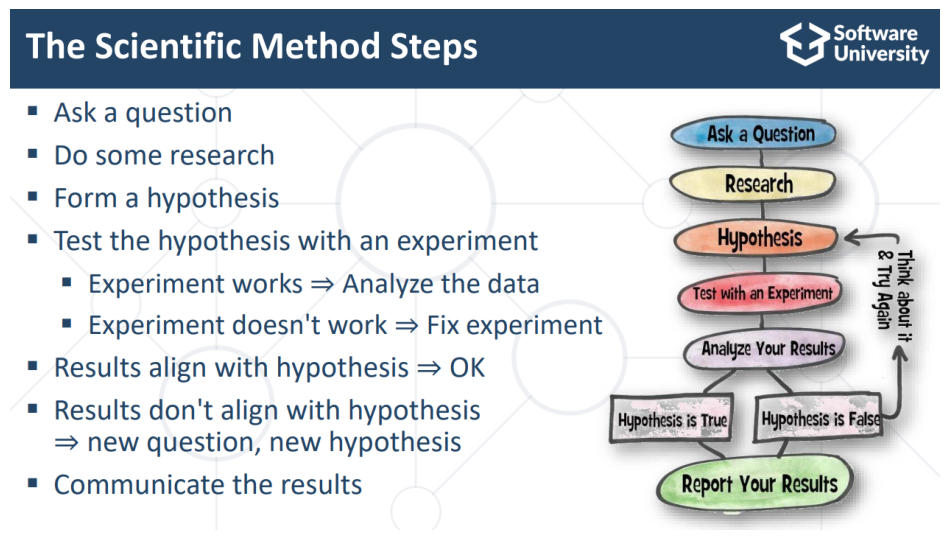

In [44]:
# This is a brief reminder of the steps we should follow in every data analysis.
scientific_method = Image.open('../pics/sm_steps.png')

plt.figure(figsize=(12, 14))
plt.imshow(scientific_method)
plt.axis('off')
plt.show()

**Ask a Question** – Can I improve my best result of 0.8122 (position 33 out of 1877)?

**Research** – Read discussions and implement some of the suggested ideas.

**Hypothesis** – In both the main and test datasets, I found many missing values, but their ratios are approximately equal. If I fill in the missing values properly, I might improve the results.

**Test with an Experiment** – ...

**Analyze Your Results**– ...

In [4]:
data = pd.read_csv('../source_data/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Basic Understanding

---



In [5]:
# Shape of the train dataset
data.shape

(8693, 14)

- The shape of the train set contains `8693` rows and `14` features

In [6]:
test_set = pd.read_csv('../source_data/test.csv')
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [7]:
# Shape of the test dataset
test_set.shape

(4277, 13)

- The shape of the test dataset contains `4277` rows and `13` features, as the target column `Transported` has been removed

### Data Types and some insights from the columns

---



In [8]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

- **PassengerId**: shows whether the passenger traveled in a group or not. This can be important for the final classification, which is why I should analyze this feature carefully.
- **HomePlanet**: when the people from different planets are separated, we may notice a correlation indicating that a person from a specific planet has a higher chance of being transported
- **CryoSleep**: It can show us whether people who are in cryogenic sleep have spent any money, whether passengers are divided by social status (richer or poorer), and whether this play important role in transportation.
- **Cabine**: `deck/num/side` This is how each cabin on the ship is encoded. In this case, one-hot encoding can be applied to provide the model with as much information as possible. This way, the model may capture hidden relationships during classification that we cannot detect ourselves, allowing it to separate the data more effectively.
- **Destination**: where the passenger was going. Some destinations may have had more transported passengers, which could mean those were priority routes or had more people in cryosleep.
- **Age**: Age is a number. We can look at how old the passengers were and see if younger or older people were more likely to be transported.
- **VIP**: Tells us if someone had special status. VIPs might act differently—they may spend more or have a different chance of being transported.
- **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, and **VRDeck** show how much people spent on different things. These values might be zero or missing, especially for those in cryosleep. Adding them up could show total spending, which might affect the chance of being transported.
- **Name** probably isn’t useful by itself, but it might help spot duplicates or we might be able to pull out titles, which could tell us more about a person’s age or status.
- **Transported** is what we’re trying to predict. So, all the above points are about trying to understand what makes a person more or less likely to be transported—whether it’s their age, origin, destination, spending, or sleep status.


## Descriptive Statistic
#### This shows descriptive statistics like mean, std, min, and percentiles for numerical features

---

In [9]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [10]:
# Current dataframe shows NaN values for all features
columns_dict = {}
for feature in data.columns:
    nan_count = data[feature].isna().sum()
    nan_percent = round((nan_count / len(data[feature])) * 100, 2)
    columns_dict[feature] = [nan_count, nan_percent]

new_data = pd.DataFrame(columns_dict, index=['NaN Values', 'NaN %'])
new_data.T

,NaN Values,NaN %
PassengerId,0.0,0.00
HomePlanet,201.0,2.31
CryoSleep,217.0,2.50
Cabin,199.0,2.29
Destination,182.0,2.09
Age,179.0,2.06
VIP,203.0,2.34
RoomService,181.0,2.08
FoodCourt,183.0,2.11
ShoppingMall,208.0,2.39


#### The missing values we observe are approximately equal, with small deviations, which suggests that this is not random and may be a key factor in the classification — how we handle these missing values will be crucial.

In [11]:
# All numeric features
numeric_data = data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [12]:
# Descriptive statistic for all numeric features
numeric_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
numeric_data['Age'].describe(
    percentiles=[0.05, 0.1, 0.15, 0.20, 0.25, 0.5, 0.75, 0.9]
)

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
5%          4.000000
10%        13.000000
15%        16.000000
20%        18.000000
25%        19.000000
50%        27.000000
75%        38.000000
90%        49.000000
max        79.000000
Name: Age, dtype: float64

### Insights from the data
#### We will examine some of the features to get an idea of their distribution.

---



**Age**: The average age is around 29 years, which means that most people on the ship are young. About 25% are under 19 years old, which likely means they are traveling with their parents. This suggests that at least another 25% of the people are probably between 30 and 45 years old. If we assume the youngest parents are around 20 years old, this is a hypothesis that should be tested.

In [14]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [15]:
people_between_30_and_45 = data[(data['Age'] >= 30) & (data['Age'] <= 45)]
print(f"People which are between 30 and 40 years old are {round(len(people_between_30_and_45) / len(data) * 100, 2)}%")

People which are between 30 and 40 years old are 28.1%


#### This assumption is made without considering the missing age values. The goal is to gain a basic understanding of the passengers’ age groups.

### Group 1 - passenger under 20 years old

In [16]:
passenger_under_20 = data[data['Age'] <= 20]
passenger_under_20

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
20,0017_02,Earth,False,F/6/P,55 Cancri e,14.0,False,412.0,0.0,1.0,0.0,679.0,Philda Brighttt,False
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,9253_01,Earth,True,G/1493/S,PSO J318.5-22,16.0,False,0.0,0.0,0.0,0.0,0.0,Jimmyn Thomason,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8679,9267_02,Europa,True,E/607/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Sabi Opshaft,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True


In [17]:
transported_passenger_under_20 = passenger_under_20[passenger_under_20['Transported'] == 1]
not_transported_passenger_under_20 = passenger_under_20[passenger_under_20['Transported'] == 0]

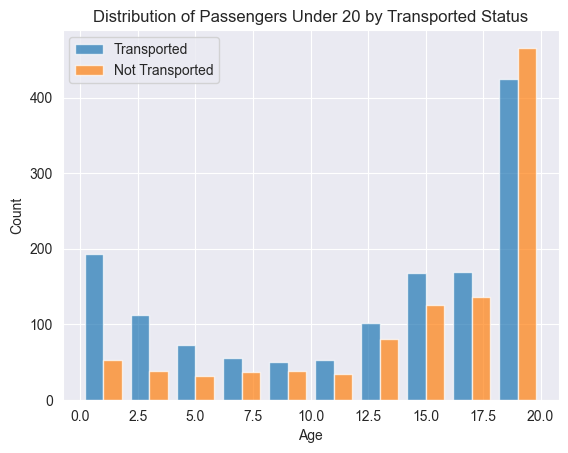

In [18]:
plt.hist(
    [transported_passenger_under_20['Age'], not_transported_passenger_under_20['Age']],
    bins=10,
    label=['Transported', 'Not Transported'],
    alpha=0.7
)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passengers Under 20 by Transported Status')
plt.legend()
plt.show()

### Group 2 - passenger between 21 and 30 years old
#### In this group, we assume there are passengers traveling alone or in pairs. Most likely, these are people who do not have children.

In [19]:
passenger_between_21_and_30 = data[(data['Age'] >= 21) & (data['Age'] <= 30)]
passenger_between_21_and_30

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
14,0011_01,Earth,False,F/2/P,TRAPPIST-1e,28.0,False,8.0,974.0,12.0,2.0,7.0,Elle Bertsontry,True
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True


In [20]:
transported_passenger_between_21_and_30 = passenger_between_21_and_30[passenger_between_21_and_30['Transported'] == 1]
not_transported_passenger_between_21_and_30 = passenger_between_21_and_30[passenger_between_21_and_30['Transported'] == 0]

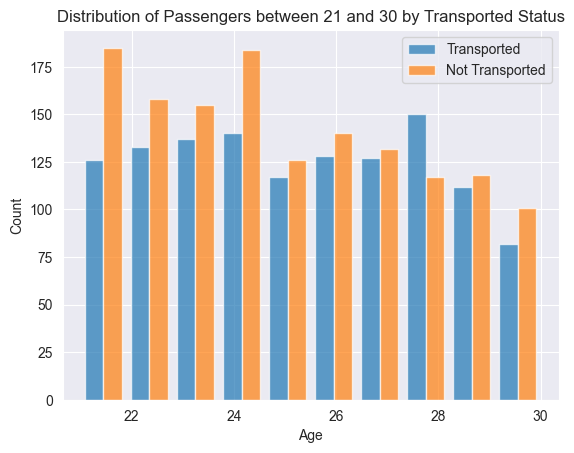

In [21]:
plt.hist(
    [transported_passenger_between_21_and_30['Age'], not_transported_passenger_between_21_and_30['Age']],
    bins=10,
    label=['Transported', 'Not Transported'],
    alpha=0.7
)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passengers between 21 and 30 by Transported Status')
plt.legend()
plt.show()

### Group 3 - Passengers between 31 and 45 years old  
#### In this group, we assume there are passengers traveling with their families (wife, husband, children).


In [22]:
passenger_between_31_and_45 = data[(data['Age'] >= 31) & (data['Age'] <= 45)]
passenger_between_31_and_45

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [23]:
transported_passenger_between_31_and_45 = passenger_between_31_and_45[passenger_between_31_and_45['Transported'] == 1]
not_transported_passenger_between_31_and_45 = passenger_between_31_and_45[passenger_between_31_and_45['Transported'] == 0]

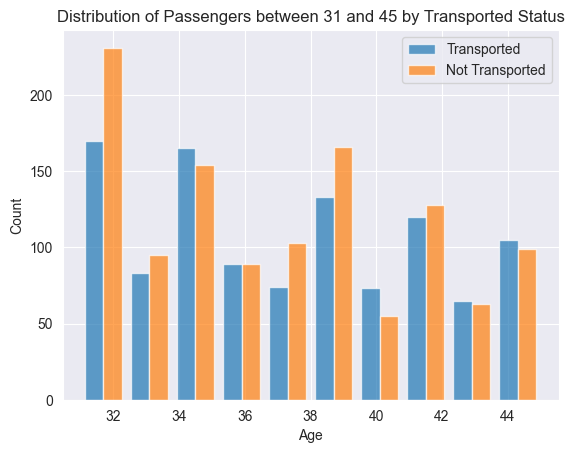

In [24]:
plt.hist(
    [transported_passenger_between_31_and_45['Age'], not_transported_passenger_between_31_and_45['Age']],
    bins=10,
    label=['Transported', 'Not Transported'],
    alpha=0.7
)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passengers between 31 and 45 by Transported Status')
plt.legend()
plt.show()

### Group 4 - Passengers aged 45 and above  

In [25]:
passenger_above_45 = data[data['Age'] >= 45]
passenger_above_45

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
13,0010_01,Earth,False,G/1/S,TRAPPIST-1e,48.0,False,719.0,1.0,65.0,0.0,24.0,Reney Baketton,False
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
22,0020_02,Earth,True,E/0/S,55 Cancri e,49.0,False,0.0,0.0,0.0,0.0,0.0,Glendy Brantuarez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,9222_01,Mars,True,F/1784/S,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,NaN,0.0,Carves Chate,True
8645,9225_01,Earth,False,F/1787/S,TRAPPIST-1e,45.0,False,1.0,197.0,0.0,660.0,15.0,Lynnon Meyersones,False
8657,9234_01,Earth,False,G/1500/P,TRAPPIST-1e,49.0,False,6.0,1.0,638.0,1107.0,23.0,Catha Bushins,False
8662,9242_01,Earth,False,F/1891/P,TRAPPIST-1e,62.0,False,102.0,696.0,0.0,0.0,0.0,Dary Bakerrison,True


In [26]:
transported_passenger_above_45 = passenger_above_45[passenger_above_45['Transported'] == 1]
not_transported_passenger_above_45 = passenger_above_45[passenger_above_45['Transported'] == 0]

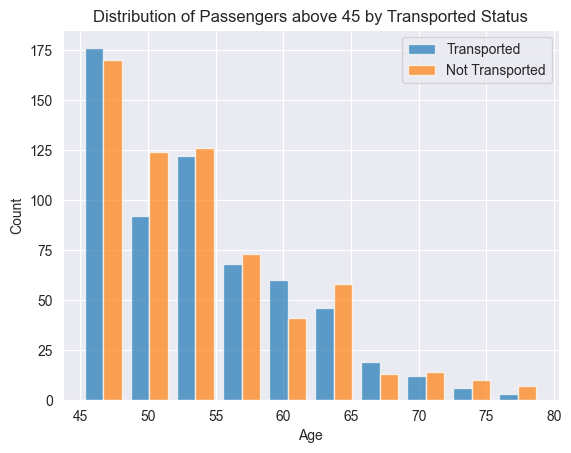

In [27]:
plt.hist(
    [transported_passenger_above_45['Age'], not_transported_passenger_above_45['Age']],
    bins=10,
    label=['Transported', 'Not Transported'],
    alpha=0.7
)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passengers above 45 by Transported Status')
plt.legend()
plt.show()

##### After dividing the passengers into four groups at random, one conclusion we can draw from the histograms is that, across the different groups, the distribution of transported and non-transported passengers is approximately the same. This was probably done intentionally by the creators of this dataset.